## Введение
В целом, число случаев возникновения торнадо растет и, предположительно, будет продолжать увеличиваться из-за изменения погодных условий в Соединенных Штатах Америки и в других местах.

## Цель исследования
Изучить как изменились торнадо за последние семь десятилетий и как измерить их воздействие?

In [5]:
# Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read Tornado data
csv_file = "data/1950-2022_all_tornados.csv"
df = pd.read_csv(csv_file)
df

om    yr  mo  dy        date      time               tz  \
0         192  1950  10   1  1950-10-01  21:00:00  America/Chicago   
1         193  1950  10   9  1950-10-09  02:15:00  America/Chicago   
2         195  1950  11  20  1950-11-20  02:20:00  America/Chicago   
3         196  1950  11  20  1950-11-20  04:00:00  America/Chicago   
4         197  1950  11  20  1950-11-20  07:30:00  America/Chicago   
...       ...   ...  ..  ..         ...       ...              ...   
68688  621922  2022   9  28  2022-09-28  13:32:00  America/Chicago   
68689  621923  2022   9  30  2022-09-30  10:25:00  America/Chicago   
68690  621924  2022   9  30  2022-09-30  13:22:00  America/Chicago   
68691  621900  2022   9   4  2022-09-04  15:44:00  America/Chicago   
68692  621901  2022   9   9  2022-09-09  23:21:00  America/Chicago   

               datetime_utc  st  stf  ...      elon    len  wid  ns  sn   f1  \
0      1950-10-02T03:00:00Z  OK   40  ... -102.3000  15.80   10   1   1   25   
1      1950-10-09T08:15:00Z  NC   37  ...    0.0000   2.00  880   1   1   47   
2      1950-11-20T08:20:00Z  KY   21  ...    0.0000   0.10   10   1   1  177   
3      1950-11-20T10:00:00Z  KY   21  ...    0.0000   0.10   10   1   1  209   
4      1950-11-20T13:30:00Z  MS   28  ...    0.0000   2.00   37   1   1  101   
...                     ...  ..  ...  ...       ...    ...  ...  ..  ..  ...   
68688  2022-09-28T18:32:00Z  FL   12  ...  -80.8841   3.00  100   1   1    9   
68689  2022-09-30T15:25:00Z  NC   37  ...  -78.3011   0.74   20   1   1   19   
68690  2022-09-30T18:22:00Z  NC   37  ...  -76.7147   0.70   12   1   1   13   
68691  2022-09-04T20:44:00Z  OH   39  ...  -80.6555   0.07   15   1   1   99   
68692  2022-09-10T04:21:00Z  SC   45  ...  -79.7537   0.68  125   1   1   19   

       f2  f3  f4     fc  
0       0   0   0  False  
1       0   0   0  False  
2       0   0   0  False  
3       0   0   0  False  
4       0   0   0  False  
...    ..  ..  ..    ...  
68688   0   0   0  False  
68689   0   0   0  False  
68690   0   0   0  False  
68691   0   0   0  False  
68692   0   0   0  False  

[68693 rows x 27 columns]

## Data Cleaning

In [7]:
df.dtypes

om                int64
yr                int64
mo                int64
dy                int64
date             object
time             object
tz               object
datetime_utc     object
st               object
stf               int64
mag             float64
inj               int64
fat               int64
loss            float64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
ns                int64
sn                int64
f1                int64
f2                int64
f3                int64
f4                int64
fc                 bool
dtype: object

In [8]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'datetime_utc', 'st',
       'stf', 'mag', 'inj', 'fat', 'loss', 'slat', 'slon', 'elat', 'elon',
       'len', 'wid', 'ns', 'sn', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [30]:
# Select tornado data for desired years
filtered_df = df.loc[df.yr >= 1995, :]
filtered_df

om    yr  mo  dy        date      time               tz  \
34186    1100  1995  10  14  1995-10-14  14:42:00  America/Chicago   
34187    1101  1995  10  14  1995-10-14  14:51:00  America/Chicago   
34188    1102  1995  10  14  1995-10-14  15:35:00  America/Chicago   
34189    1103  1995  10  17  1995-10-17  06:25:00  America/Chicago   
34190    1104  1995  10  20  1995-10-20  22:12:00  America/Chicago   
...       ...   ...  ..  ..         ...       ...              ...   
68688  621922  2022   9  28  2022-09-28  13:32:00  America/Chicago   
68689  621923  2022   9  30  2022-09-30  10:25:00  America/Chicago   
68690  621924  2022   9  30  2022-09-30  13:22:00  America/Chicago   
68691  621900  2022   9   4  2022-09-04  15:44:00  America/Chicago   
68692  621901  2022   9   9  2022-09-09  23:21:00  America/Chicago   

               datetime_utc  st  stf  ...     elon   len  wid  ns  sn   f1  \
34186  1995-10-14T19:42:00Z  VA   51  ...   0.0000  0.70   40   1   1  153   
34187  1995-10-14T19:51:00Z  MD   24  ... -76.5000  3.80   73   1   1    3   
34188  1995-10-14T20:35:00Z  MD   24  ...   0.0000  1.00   23   1   1   13   
34189  1995-10-17T11:25:00Z  FL   12  ...   0.0000  0.10   10   1   1   99   
34190  1995-10-21T03:12:00Z  MD   24  ...   0.0000  0.60   73   1   1   21   
...                     ...  ..  ...  ...      ...   ...  ...  ..  ..  ...   
68688  2022-09-28T18:32:00Z  FL   12  ... -80.8841  3.00  100   1   1    9   
68689  2022-09-30T15:25:00Z  NC   37  ... -78.3011  0.74   20   1   1   19   
68690  2022-09-30T18:22:00Z  NC   37  ... -76.7147  0.70   12   1   1   13   
68691  2022-09-04T20:44:00Z  OH   39  ... -80.6555  0.07   15   1   1   99   
68692  2022-09-10T04:21:00Z  SC   45  ... -79.7537  0.68  125   1   1   19   

       f2  f3  f4     fc  
34186   0   0   0  False  
34187   0   0   0  False  
34188   0   0   0  False  
34189   0   0   0  False  
34190   0   0   0  False  
...    ..  ..  ..    ...  
68688   0   0   0  False  
68689   0   0   0  False  
68690   0   0   0  False  
68691   0   0   0  False  
68692   0   0   0  False  

[34507 rows x 27 columns]

In [31]:
# Select derired columns

df1 = filtered_df[['yr', 'mo', 'st', 'mag', 'inj', 'fat',\
                   'loss', 'len', 'wid', 'slat', 'slon']]
df1

yr  mo  st  mag  inj  fat      loss   len  wid     slat     slon
34186  1995  10  VA  0.0    0    0   50000.0  0.70   40  38.6200 -77.3000
34187  1995  10  MD  1.0    0    0  500000.0  3.80   73  39.0300 -76.6000
34188  1995  10  MD  0.0    0    0    5000.0  1.00   23  39.6000 -77.0300
34189  1995  10  FL  0.0    0    0   50000.0  0.10   10  26.9000 -80.2300
34190  1995  10  MD  0.0    0    0   50000.0  0.60   73  39.6200 -77.4200
...     ...  ..  ..  ...  ...  ...       ...   ...  ...      ...      ...
68688  2022   9  FL  0.0    0    0       NaN  3.00  100  28.0830 -80.8669
68689  2022   9  NC  0.0    0    0       NaN  0.74   20  33.9128 -78.2882
68690  2022   9  NC  NaN    0    0       NaN  0.70   12  35.3242 -76.7076
68691  2022   9  OH  0.0    0    0   12000.0  0.07   15  41.0210 -80.6559
68692  2022   9  SC  0.0    0    0       NaN  0.68  125  32.8750 -79.7514

[34507 rows x 11 columns]

In [32]:
df1.reset_index(inplace = True, drop = True)
df1

yr  mo  st  mag  inj  fat      loss   len  wid     slat     slon
0      1995  10  VA  0.0    0    0   50000.0  0.70   40  38.6200 -77.3000
1      1995  10  MD  1.0    0    0  500000.0  3.80   73  39.0300 -76.6000
2      1995  10  MD  0.0    0    0    5000.0  1.00   23  39.6000 -77.0300
3      1995  10  FL  0.0    0    0   50000.0  0.10   10  26.9000 -80.2300
4      1995  10  MD  0.0    0    0   50000.0  0.60   73  39.6200 -77.4200
...     ...  ..  ..  ...  ...  ...       ...   ...  ...      ...      ...
34502  2022   9  FL  0.0    0    0       NaN  3.00  100  28.0830 -80.8669
34503  2022   9  NC  0.0    0    0       NaN  0.74   20  33.9128 -78.2882
34504  2022   9  NC  NaN    0    0       NaN  0.70   12  35.3242 -76.7076
34505  2022   9  OH  0.0    0    0   12000.0  0.07   15  41.0210 -80.6559
34506  2022   9  SC  0.0    0    0       NaN  0.68  125  32.8750 -79.7514

[34507 rows x 11 columns]

In [33]:
# States Data
data = {'StName':['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Idaho',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']}

states_df = pd.DataFrame(data)
cw_filename = 'state_codes.html'

states = pd.read_html(cw_filename)[0]
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
states_df['StAbbr'] = states_df['StName'].map(state_code_map)
code_state_map = dict(zip(states['Code'],
                          states['Description']))
states_df['StNameAgain'] = states_df['StAbbr'].map(code_state_map)
states_df = states_df.rename(columns={'stName': 'State_Name', 'StAbbr': 'st'})
states_df.head()

StName  st StNameAgain
0     Alabama  AL     Alabama
1      Alaska  AK      Alaska
2     Arizona  AZ     Arizona
3    Arkansas  AR    Arkansas
4  California  CA  California

In [34]:
states_df.columns

Index(['StName', 'st', 'StNameAgain'], dtype='object')

In [35]:
# Merge dataframes
new_df2 = pd.merge(df1, states_df, on='st', how='left')
# new_df2

df3 = new_df2[[
'yr',
'mo',
'st',
'mag',
'inj',
'fat',
'loss',
'len',
'wid',
'slat',
'slon',
'StName']]
df3

yr  mo  st  mag  inj  fat      loss   len  wid     slat     slon  \
0      1995  10  VA  0.0    0    0   50000.0  0.70   40  38.6200 -77.3000   
1      1995  10  MD  1.0    0    0  500000.0  3.80   73  39.0300 -76.6000   
2      1995  10  MD  0.0    0    0    5000.0  1.00   23  39.6000 -77.0300   
3      1995  10  FL  0.0    0    0   50000.0  0.10   10  26.9000 -80.2300   
4      1995  10  MD  0.0    0    0   50000.0  0.60   73  39.6200 -77.4200   
...     ...  ..  ..  ...  ...  ...       ...   ...  ...      ...      ...   
34606  2022   9  FL  0.0    0    0       NaN  3.00  100  28.0830 -80.8669   
34607  2022   9  NC  0.0    0    0       NaN  0.74   20  33.9128 -78.2882   
34608  2022   9  NC  NaN    0    0       NaN  0.70   12  35.3242 -76.7076   
34609  2022   9  OH  0.0    0    0   12000.0  0.07   15  41.0210 -80.6559   
34610  2022   9  SC  0.0    0    0       NaN  0.68  125  32.8750 -79.7514   

               StName  
0            Virginia  
1            Maryland  
2            Maryland  
3             Florida  
4            Maryland  
...               ...  
34606         Florida  
34607  North Carolina  
34608  North Carolina  
34609            Ohio  
34610  South Carolina  

[34611 rows x 12 columns]

In [50]:
df_clean = df3.copy()
df_clean

yr  mo  st  mag  inj  fat      loss   len  wid     slat     slon  \
0      1995  10  VA  0.0    0    0   50000.0  0.70   40  38.6200 -77.3000   
1      1995  10  MD  1.0    0    0  500000.0  3.80   73  39.0300 -76.6000   
2      1995  10  MD  0.0    0    0    5000.0  1.00   23  39.6000 -77.0300   
3      1995  10  FL  0.0    0    0   50000.0  0.10   10  26.9000 -80.2300   
4      1995  10  MD  0.0    0    0   50000.0  0.60   73  39.6200 -77.4200   
...     ...  ..  ..  ...  ...  ...       ...   ...  ...      ...      ...   
34606  2022   9  FL  0.0    0    0       NaN  3.00  100  28.0830 -80.8669   
34607  2022   9  NC  0.0    0    0       NaN  0.74   20  33.9128 -78.2882   
34608  2022   9  NC  NaN    0    0       NaN  0.70   12  35.3242 -76.7076   
34609  2022   9  OH  0.0    0    0   12000.0  0.07   15  41.0210 -80.6559   
34610  2022   9  SC  0.0    0    0       NaN  0.68  125  32.8750 -79.7514   

               StName  
0            Virginia  
1            Maryland  
2            Maryland  
3             Florida  
4            Maryland  
...               ...  
34606         Florida  
34607  North Carolina  
34608  North Carolina  
34609            Ohio  
34610  South Carolina  

[34611 rows x 12 columns]

## Разведочный анализ данных (англ. exploratory data analysis (EDA))

Цель найти зависимости целевого признака magnitude от других признаков

In [18]:
import seaborn as sns
# sns.countplot(df_clean["mag"], label="Count")
# plt.show()

In [14]:
from plotly.express import histogram
histogram(data_frame=df_clean, x='mag',)

In [51]:
# Select the rows where magnitude >= 0
df_magfilt = df_clean[df_clean['mag'] >= 0]
df_magfilt

yr  mo  st  mag  inj  fat      loss   len  wid     slat     slon  \
0      1995  10  VA  0.0    0    0   50000.0  0.70   40  38.6200 -77.3000   
1      1995  10  MD  1.0    0    0  500000.0  3.80   73  39.0300 -76.6000   
2      1995  10  MD  0.0    0    0    5000.0  1.00   23  39.6000 -77.0300   
3      1995  10  FL  0.0    0    0   50000.0  0.10   10  26.9000 -80.2300   
4      1995  10  MD  0.0    0    0   50000.0  0.60   73  39.6200 -77.4200   
...     ...  ..  ..  ...  ...  ...       ...   ...  ...      ...      ...   
34605  2022   9  FL  0.0    0    0    2000.0  0.20   50  26.5282 -80.0680   
34606  2022   9  FL  0.0    0    0       NaN  3.00  100  28.0830 -80.8669   
34607  2022   9  NC  0.0    0    0       NaN  0.74   20  33.9128 -78.2882   
34609  2022   9  OH  0.0    0    0   12000.0  0.07   15  41.0210 -80.6559   
34610  2022   9  SC  0.0    0    0       NaN  0.68  125  32.8750 -79.7514   

               StName  
0            Virginia  
1            Maryland  
2            Maryland  
3             Florida  
4            Maryland  
...               ...  
34605         Florida  
34606         Florida  
34607  North Carolina  
34609            Ohio  
34610  South Carolina  

[33855 rows x 12 columns]

In [27]:
# sns.countplot(df_magfilt["mag"], label="Count")
# plt.show()

In [52]:
# df_magfilt['adjusted magnitude'] = df_magfilt['mag']
df_magfilt.loc[:, 'adjusted magnitude'] = df_magfilt['mag']

df_magfilt = df_magfilt.replace({'adjusted magnitude': {3: 2, 4: 2, 5:2}})
df_magfilt

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7836\591066979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_magfilt.loc[:, 'adjusted magnitude'] = df_magfilt['mag']


yr  mo  st  mag  inj  fat      loss   len  wid     slat     slon  \
0      1995  10  VA  0.0    0    0   50000.0  0.70   40  38.6200 -77.3000   
1      1995  10  MD  1.0    0    0  500000.0  3.80   73  39.0300 -76.6000   
2      1995  10  MD  0.0    0    0    5000.0  1.00   23  39.6000 -77.0300   
3      1995  10  FL  0.0    0    0   50000.0  0.10   10  26.9000 -80.2300   
4      1995  10  MD  0.0    0    0   50000.0  0.60   73  39.6200 -77.4200   
...     ...  ..  ..  ...  ...  ...       ...   ...  ...      ...      ...   
34605  2022   9  FL  0.0    0    0    2000.0  0.20   50  26.5282 -80.0680   
34606  2022   9  FL  0.0    0    0       NaN  3.00  100  28.0830 -80.8669   
34607  2022   9  NC  0.0    0    0       NaN  0.74   20  33.9128 -78.2882   
34609  2022   9  OH  0.0    0    0   12000.0  0.07   15  41.0210 -80.6559   
34610  2022   9  SC  0.0    0    0       NaN  0.68  125  32.8750 -79.7514   

               StName  adjusted magnitude  
0            Virginia                 0.0  
1            Maryland                 1.0  
2            Maryland                 0.0  
3             Florida                 0.0  
4            Maryland                 0.0  
...               ...                 ...  
34605         Florida                 0.0  
34606         Florida                 0.0  
34607  North Carolina                 0.0  
34609            Ohio                 0.0  
34610  South Carolina                 0.0  

[33855 rows x 13 columns]

In [53]:
df_magfilt["adjusted magnitude"].value_counts()

adjusted magnitude
0.0    19893
1.0    10273
2.0     3689
Name: count, dtype: int64

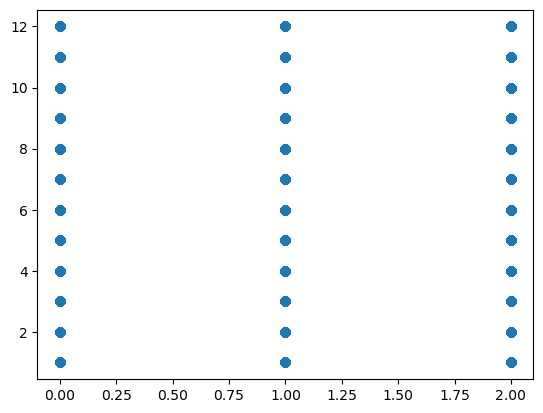

In [40]:
# month - no trend
plt.scatter(df_magfilt["adjusted magnitude"], df_magfilt["mo"])

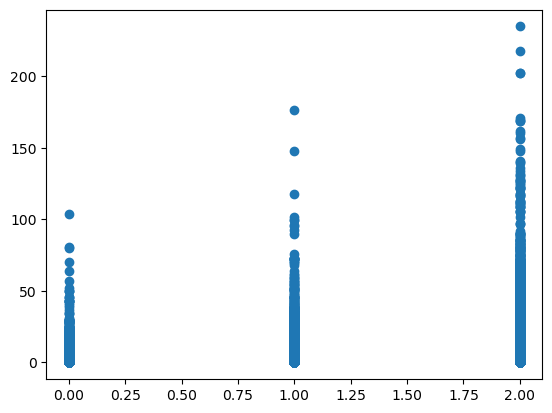

In [41]:
# length - positive trend
plt.scatter(df_magfilt["adjusted magnitude"], df_magfilt["len"])

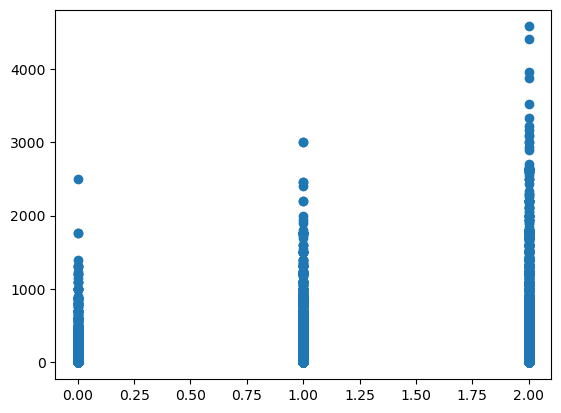

In [42]:
# width - positive trend
plt.scatter(df_magfilt["adjusted magnitude"], df_magfilt["wid"])

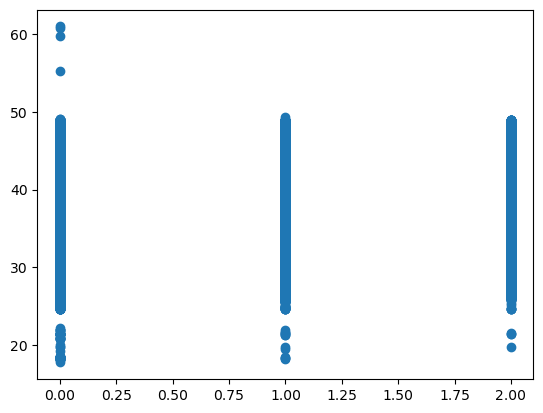

In [43]:
# latitude - weak negative trend
plt.scatter(df_magfilt["adjusted magnitude"], df_magfilt["slat"])

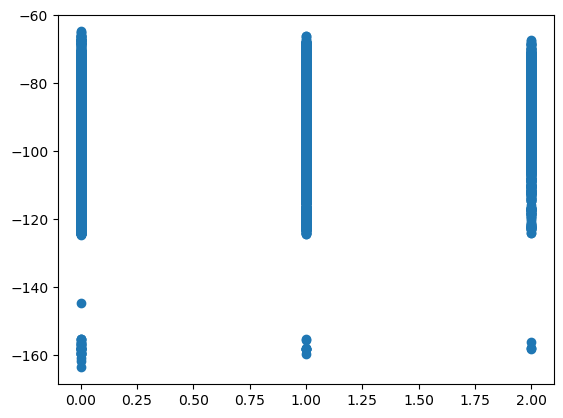

In [45]:
# longitude - weak reverse trend
plt.scatter(df_magfilt["adjusted magnitude"], df_magfilt["slon"])

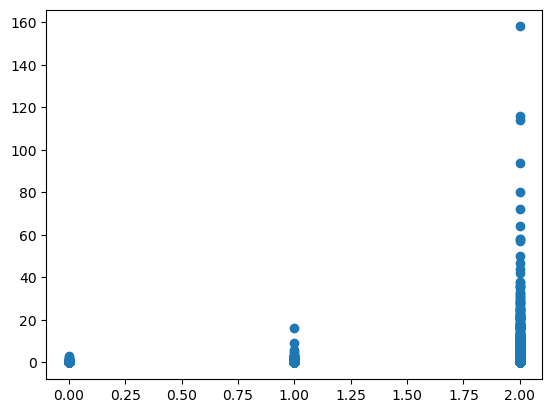

In [46]:
# fatalities - positive trend
plt.scatter(df_magfilt["adjusted magnitude"], df_magfilt["fat"])

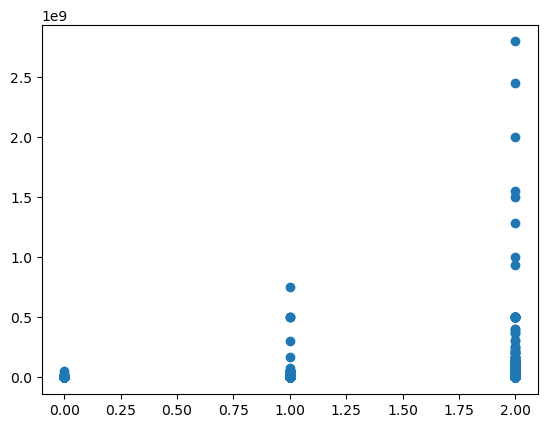

In [47]:
# loss - positive trend
plt.scatter(df_magfilt["adjusted magnitude"], df_magfilt["loss"])

In [54]:
df_magfilt["mag"].max()

5.0

In [48]:
df_magfilt.columns

Index(['yr', 'mo', 'st', 'mag', 'inj', 'fat', 'loss', 'len', 'wid', 'slat',
       'slon', 'StName', 'adjusted magnitude'],
      dtype='object')

В этом наборе данных мы можем визуализировать количество торнадо, которые происходили каждый год, чтобы увидеть тенденцию изменения количества торнадо за последние несколько десятилетий.

In [21]:
from plotly.express import bar
bar(data_frame=df['yr'].value_counts().to_frame().reset_index(), x='yr', y='count')

In [20]:
from plotly.express import scatter
scatter(data_frame=df['yr'].value_counts().to_frame().reset_index(), x='yr', y='count', trendline='ols')

In [25]:
bar(data_frame=df['st'].value_counts().to_frame().reset_index(), x='st', y='count', color='st')

In [16]:
from plotly.express import scatter_geo
scatter_geo(data_frame=df.sample(n=len(df) // 10), lat='slat', lon='slon', color='st', scope='usa')

In [19]:
# US Tornado occurencies (1950-2022)
scatter_geo(data_frame=df.sample(n=len(df) // 10), lat='slat', lon='slon', color='mag', scope='usa')

In [23]:
import plotly.express as px

Торнадо случаются во всех штатах США, но больше всего их в средних и восточных штатах.

Text(0, 0.5, '')

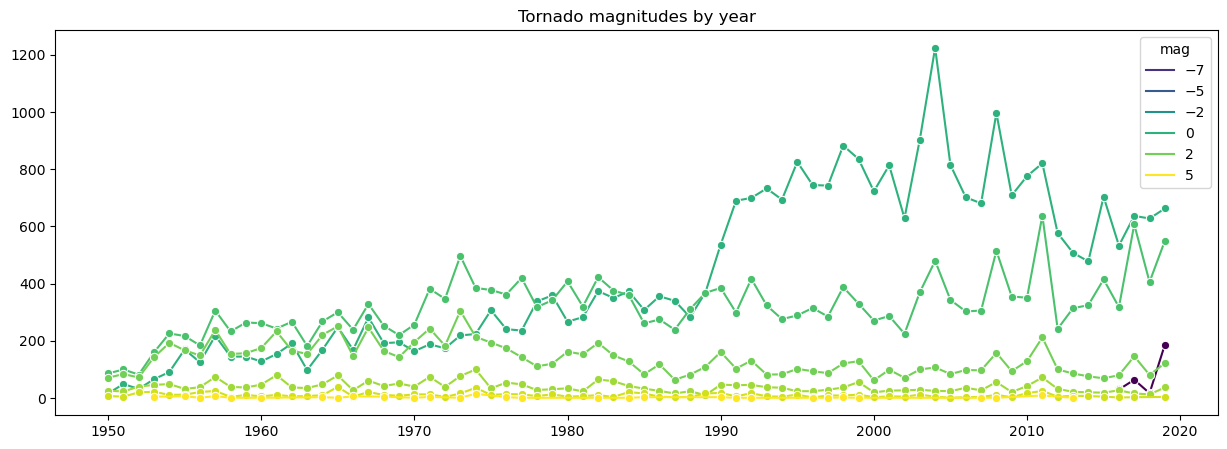

In [56]:
# Plot tornados by year and magnitude
to = df.groupby(['yr', 'mag'])['yr'].count().reset_index(name = 'Count')
plt.figure(figsize = (15, 5)) 
sns.lineplot(data=to, x='yr', y='Count', hue='mag', marker='o', palette = 'viridis').set(title = 'Tornado magnitudes by year')
plt.xlabel('')
plt.ylabel('')

In [17]:
inj_df = df_clean[df_clean['inj'] > 0]
scatter_geo(data_frame=inj_df, lat='slat', lon='slon', color='inj', scope='usa')

Смертельные случаи относительно редки. Но если мы отфильтруем все торнадо с нулевыми смертечльными случаями, то увидим, что множество с небольшим количеством fatalities мало, а множество с большим количеством fatalities еще меньше.

In [18]:
fat_df = df_clean[df_clean['fat'] > 0]
scatter_geo(data_frame=fat_df, lat='slat', lon='slon', color='fat', scope='usa')

Смертельные случаи (fatalities) встречаются еще реже и распределяются аналогичным образом.

## Machine Learning

In [55]:
cleaned = df_magfilt[["yr", "mo", "fat", "loss", "len", "wid", "slat", "slon", "StName", "mag"]]
cleaned

yr  mo  fat      loss   len  wid     slat     slon          StName  \
0      1995  10    0   50000.0  0.70   40  38.6200 -77.3000        Virginia   
1      1995  10    0  500000.0  3.80   73  39.0300 -76.6000        Maryland   
2      1995  10    0    5000.0  1.00   23  39.6000 -77.0300        Maryland   
3      1995  10    0   50000.0  0.10   10  26.9000 -80.2300         Florida   
4      1995  10    0   50000.0  0.60   73  39.6200 -77.4200        Maryland   
...     ...  ..  ...       ...   ...  ...      ...      ...             ...   
34605  2022   9    0    2000.0  0.20   50  26.5282 -80.0680         Florida   
34606  2022   9    0       NaN  3.00  100  28.0830 -80.8669         Florida   
34607  2022   9    0       NaN  0.74   20  33.9128 -78.2882  North Carolina   
34609  2022   9    0   12000.0  0.07   15  41.0210 -80.6559            Ohio   
34610  2022   9    0       NaN  0.68  125  32.8750 -79.7514  South Carolina   

       mag  
0      0.0  
1      1.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
34605  0.0  
34606  0.0  
34607  0.0  
34609  0.0  
34610  0.0  

[33855 rows x 10 columns]

### Корреляционная матрица

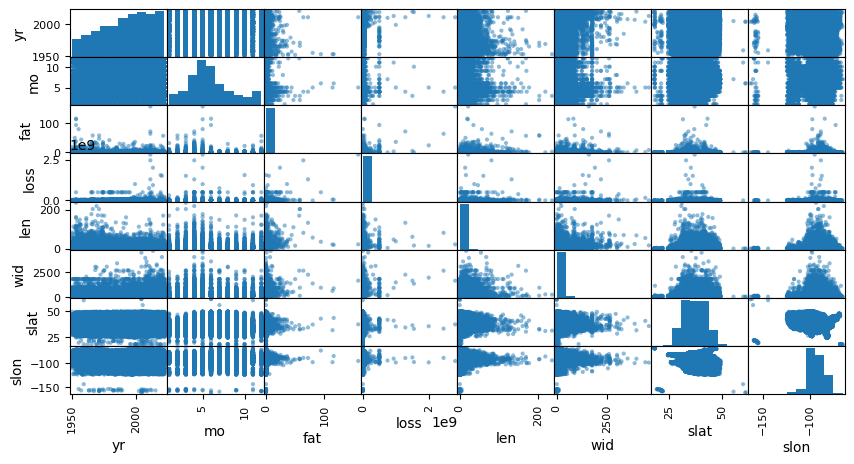

In [53]:
# data is not balanced
from pandas.plotting import scatter_matrix 

scatter_matrix(cleaned.drop('mag', axis=1), figsize=(10,5))
plt.show()

## Predict Tornado Category (magnitude)

In [56]:
# Choose our features
X = cleaned[["fat", "len", "wid", "slat", "slon"]]
X

fat   len  wid     slat     slon
0        0  0.70   40  38.6200 -77.3000
1        0  3.80   73  39.0300 -76.6000
2        0  1.00   23  39.6000 -77.0300
3        0  0.10   10  26.9000 -80.2300
4        0  0.60   73  39.6200 -77.4200
...    ...   ...  ...      ...      ...
34605    0  0.20   50  26.5282 -80.0680
34606    0  3.00  100  28.0830 -80.8669
34607    0  0.74   20  33.9128 -78.2882
34609    0  0.07   15  41.0210 -80.6559
34610    0  0.68  125  32.8750 -79.7514

[33855 rows x 5 columns]

In [57]:
# Choose our label
y = cleaned['mag']
y

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
34605    0.0
34606    0.0
34607    0.0
34609    0.0
34610    0.0
Name: mag, Length: 33855, dtype: float64

## Preprocessing

### Create training and testing sets

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

### Output CSV file for weights for app

In [59]:
# keep columns used as predictors of cleaned dataframe

train_output = X_train[["fat", "len", "wid", "slat", "slon"]]
train_output.head()

fat   len  wid     slat     slon
29896    0  1.13   75  33.0686 -84.2245
1589     0  2.50   75  36.8000 -90.5300
22975    0  1.40  100  32.2436 -88.5303
25300    0  2.26   50  28.5419 -99.3889
26796    0  0.22   10  42.4109 -91.3927

In [69]:
# output to csv

train_output.to_csv(r'cleaned.csv',index=False)

### Apply Scaler

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train
X_test_scaled = X_test

### Build Models

In [112]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import numpy as np

def model(classifier, x_train, y_train, x_test, y_test):
    # Обучение классификатора на тренировочных данных
    classifier.fit(x_train, y_train)

    # Предсказание на тестовых данных
    prediction = classifier.predict(x_test)

    # Получение вероятностей для положительного класса
    probabilities = classifier.predict_proba(x_test)[:, 1]

    # Настройка кросс-валидации
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Вывод основных метрик качества модели
    print("Accuracy : ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))

In [61]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class = 'ovr')
logreg.fit(X_train_scaled, y_train)

print('Accuracy of Logistic Regression on training data', logreg.score(X_train_scaled, y_train))
print('Accuracy of Logistic Regression on testing data', logreg.score(X_test_scaled, y_test))

Accuracy of Logistic Regression on training data 0.672721902230099
Accuracy of Logistic Regression on testing data 0.6650420912715995


In [118]:
model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

Accuracy :  56.76%


C:\Users\Anastasia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [62]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

print('Accuracy of Decision Tree on training', dt.score(X_train_scaled, y_train))
print('Accuracy of Decision Tree on testing', dt.score(X_test_scaled, y_test))

Accuracy of Decision Tree on training 0.9997046226554424
Accuracy of Decision Tree on testing 0.6387535076059666


In [63]:
# Setting max decision tree depth to help avoid overfitting
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt2.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt2.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.7069487520307193
Accuracy of Decision tree on testing 0.6948752030719244


In [64]:
# K-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print('Accuracy of KNN on training', knn.score(X_train_scaled, y_train))
print('Accuracy of KNN on testing', knn.score(X_test_scaled, y_test))

Accuracy of KNN on training 0.7721533008418254
Accuracy of KNN on testing 0.6768571850539064


In [65]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled,y_train)
print('Accuracy of Linear Discriminant Analysis on training', lda.score(X_train_scaled, y_train))
print('Accuracy of Linear Discriminant Analysis on testing', lda.score(X_test_scaled, y_test))

Accuracy of Linear Discriminant Analysis on training 0.6471717619258602
Accuracy of Linear Discriminant Analysis on testing 0.6378673755722936


In [66]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print('Accuracy of GNB on training', gnb.score(X_train_scaled, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test_scaled, y_test))

Accuracy of GNB on training 0.662568306010929
Accuracy of GNB on testing 0.6489440259932063


In [67]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('Accuracy of SVM on training', svm.score(X_train_scaled, y_train))
print('Accuracy of SVM on testing', svm.score(X_test_scaled, y_test))

Accuracy of SVM on training 0.6833554866341751
Accuracy of SVM on testing 0.6746418549697238


### Save and load the best model

In [45]:
import pickle

In [46]:
pickle.dump(dt2, open('model.pkl','wb'))

In [47]:
# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))

In [52]:
import joblib

# Сохранение модели
joblib.dump(dt2, 'model1.pkl')

['model1.pkl']

### Make Prediction on tornado category (magnitude)

In [49]:
user_input = [[50, 100, 900, 31.51, -93.92,]]
inputdf = pd.DataFrame(user_input,columns=["fat", "len", "wid", "slat", "slon"])
original_df = X.copy() # Предположим, что X - ваш исходный DataFrame

# Соединяем original_df и inputdf вместе
reference = pd.concat([original_df, inputdf]).reset_index(drop=True)
# reference = original_df.append(inputdf).reset_index()

# Выбираем только нужные столбцы
new_df = reference[["fat", "len", "wid", "slat", "slon"]]

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_df)
# Преобразуем последний элемент scaled_df обратно в список и выводим его
[list(scaled_df[-1])]
# [list(scaled_df[len(scaled_df)-1])]
scaled_df

array([[0.        , 0.10069141, 0.00437063, 0.51655195, 0.43600563],
       [0.        , 0.0335638 , 0.00655594, 0.49541134, 0.43631138],
       [0.        , 0.00134255, 0.00437063, 0.49115044, 0.43637253],
       ...,
       [0.        , 0.02168222, 0.02731643, 0.53305146, 0.45476182],
       [0.        , 0.0340337 , 0.01092657, 0.56955261, 0.46751238],
       [0.3164557 , 0.6712761 , 0.19667832, 0.51638807, 0.42567113]])

In [51]:
# model.predict([list(scaled_df[len(scaled_df)-1])])
model.predict([list(scaled_df[-1])])

array([4], dtype=int64)